In [ ]:
%pip install seaborn
%pip install -U scikit-learn

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#df= pd.read_csv("car_crashes")
df=sns.load_dataset(name='car_crashes')
df.head(5)

In [ ]:
from turtle import color


sns.scatterplot(x='alcohol', y='total', color="blue", data=df)
#sns.scatterplot(x='speeding', y='total', color="red", data=df)

****************************Variables Dependientes e Independientes***************************

In [ ]:
#Declaramos las variables dependientes e independientes para la regresión lineal
#Vars_Indep= df[['alcohol', 'speeding']]
Vars_Indep= df[['alcohol']]
Var_Dep= df['total']

In [ ]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model= LinearRegression()

In [ ]:
type(model)

In [ ]:
model.fit(X=Vars_Indep, y=Var_Dep)

In [ ]:
model.__dict__

$$
total= 2.0325063 \cdot alcohol + 5.857776154826299

$$

****************************Modelo predictivo***************************

In [ ]:
#Predecimos los valores de total de accidentes a partir de la variable "alcohol"
#y_pred= model.predict(X=df[['alcohol', 'speeding']])
y_pred= model.predict(X=df[['alcohol']])
y_pred

In [ ]:
#Insertamos la columna de predicciones en el DataFrame
df.insert(0, 'Predicciones', y_pred)
df

In [ ]:
#Visualizamos la gráfica comparativa entre el total real y el total predecido

sns.scatterplot(x='alcohol', y='total', color="blue", data=df)
sns.scatterplot(x='alcohol', y='Predicciones', color="red", data=df)
#sns.lineplot(x='alcohol', y='Predicciones', color="red", data=df)

In [ ]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
coef_Deter

In [ ]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
coef_Correl

**************************************CONTINUACIÓN**************************************

In [ ]:
#Graficamos todas las dispersiones entre las variables "Predicción, "total" y "alcohol"
sns.pairplot(df[['total','alcohol']])
sns.pairplot(df[['Predicciones','alcohol']])

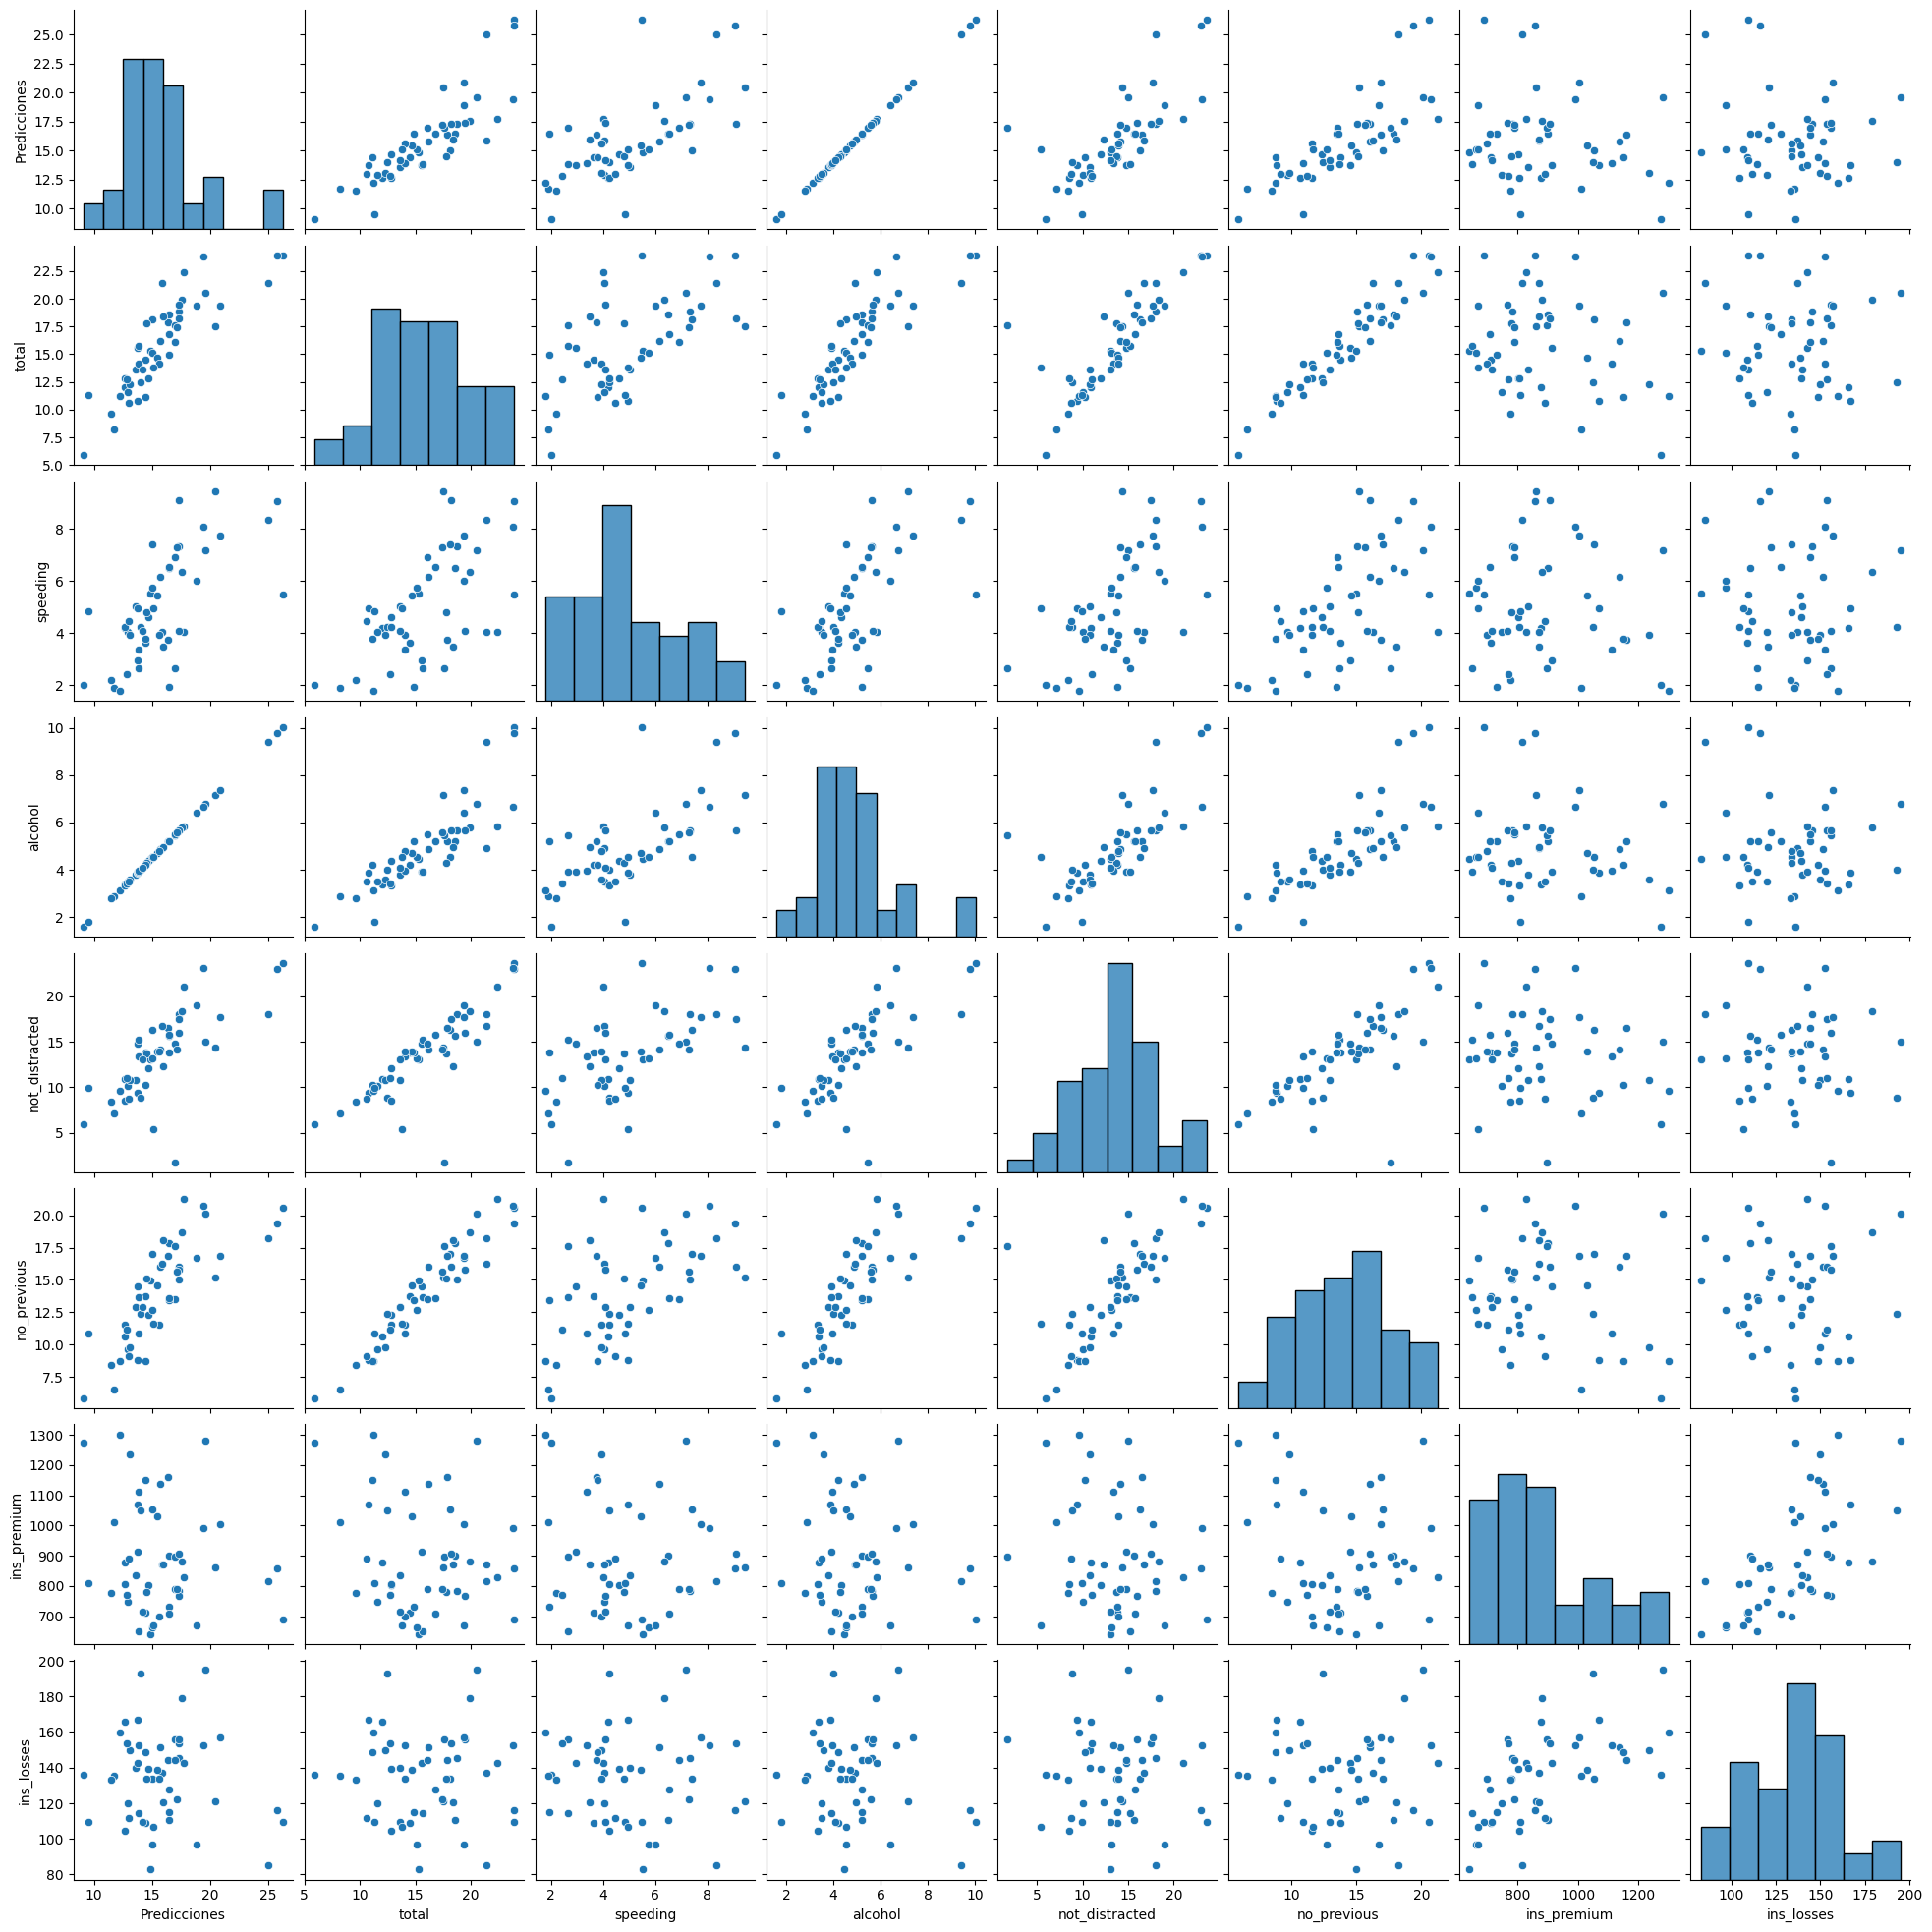

In [48]:
#Graficamos todas las dispersiones entre todas las variables
sns.pairplot(df)


In [51]:
#Encontramos todas las correlaciones entre las variables 
Corr_Factors=df.corr()
Corr_Factors

,Predicciones,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses
Predicciones,1.000000,0.852613,0.669719,1.000000,0.732816,0.783520,-0.170612,-0.112547
total,0.852613,1.000000,0.611548,0.852613,0.827560,0.956179,-0.199702,-0.036011
speeding,0.669719,0.611548,1.000000,0.669719,0.588010,0.571976,-0.077675,-0.065928
alcohol,1.000000,0.852613,0.669719,1.000000,0.732816,0.783520,-0.170612,-0.112547
not_distracted,0.732816,0.827560,0.588010,0.732816,1.000000,0.747307,-0.174856,-0.075970
no_previous,0.783520,0.956179,0.571976,0.783520,0.747307,1.000000,-0.156895,-0.006359
ins_premium,-0.170612,-0.199702,-0.077675,-0.170612,-0.174856,-0.156895,1.000000,0.623116
ins_losses,-0.112547,-0.036011,-0.065928,-0.112547,-0.075970,-0.006359,0.623116,1.000000


In [69]:
#Encontramos el valor absoluto de todas las correlaciones entre las variables 
Corr_Factors1= abs(Corr_Factors)
Corr_Factors1

,Predicciones,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses
Predicciones,1.000000,0.852613,0.669719,1.000000,0.732816,0.783520,0.170612,0.112547
total,0.852613,1.000000,0.611548,0.852613,0.827560,0.956179,0.199702,0.036011
speeding,0.669719,0.611548,1.000000,0.669719,0.588010,0.571976,0.077675,0.065928
alcohol,1.000000,0.852613,0.669719,1.000000,0.732816,0.783520,0.170612,0.112547
not_distracted,0.732816,0.827560,0.588010,0.732816,1.000000,0.747307,0.174856,0.075970
no_previous,0.783520,0.956179,0.571976,0.783520,0.747307,1.000000,0.156895,0.006359
ins_premium,0.170612,0.199702,0.077675,0.170612,0.174856,0.156895,1.000000,0.623116
ins_losses,0.112547,0.036011,0.065928,0.112547,0.075970,0.006359,0.623116,1.000000


<AxesSubplot:>

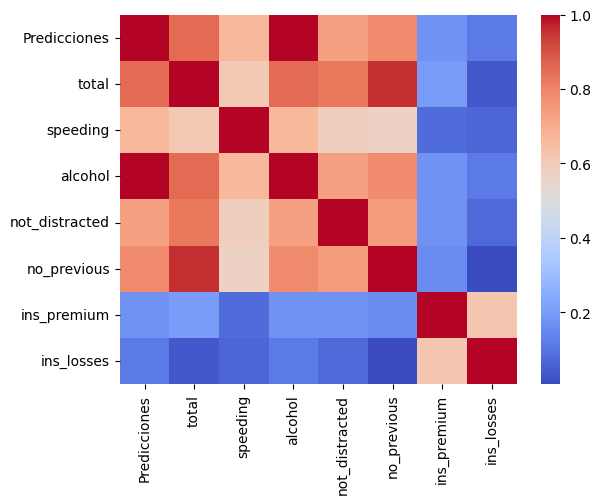

In [70]:
#Graficamos el mapa de calor de los coeficientes de correlación 
Heat_Map= sns.heatmap(Corr_Factors1, cmap = 'coolwarm')  
Heat_Map

<AxesSubplot:>

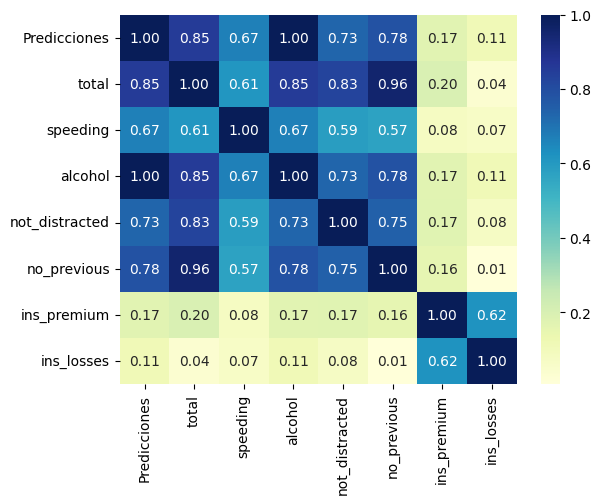

In [73]:
#Ajustamos el mapa de calor de los coeficientes de correlación 
Heat_Map= sns.heatmap(Corr_Factors1, cmap = 'YlGnBu', annot=True, fmt=".2f")  
Heat_Map